In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# df.count(), NaN değerlerini içermez
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("Bırakılan sütunların listesi:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')

Bırakılan sütunların listesi: Id, Alley, PoolQC, Fence, MiscFeature, 



In [6]:
df = df2

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


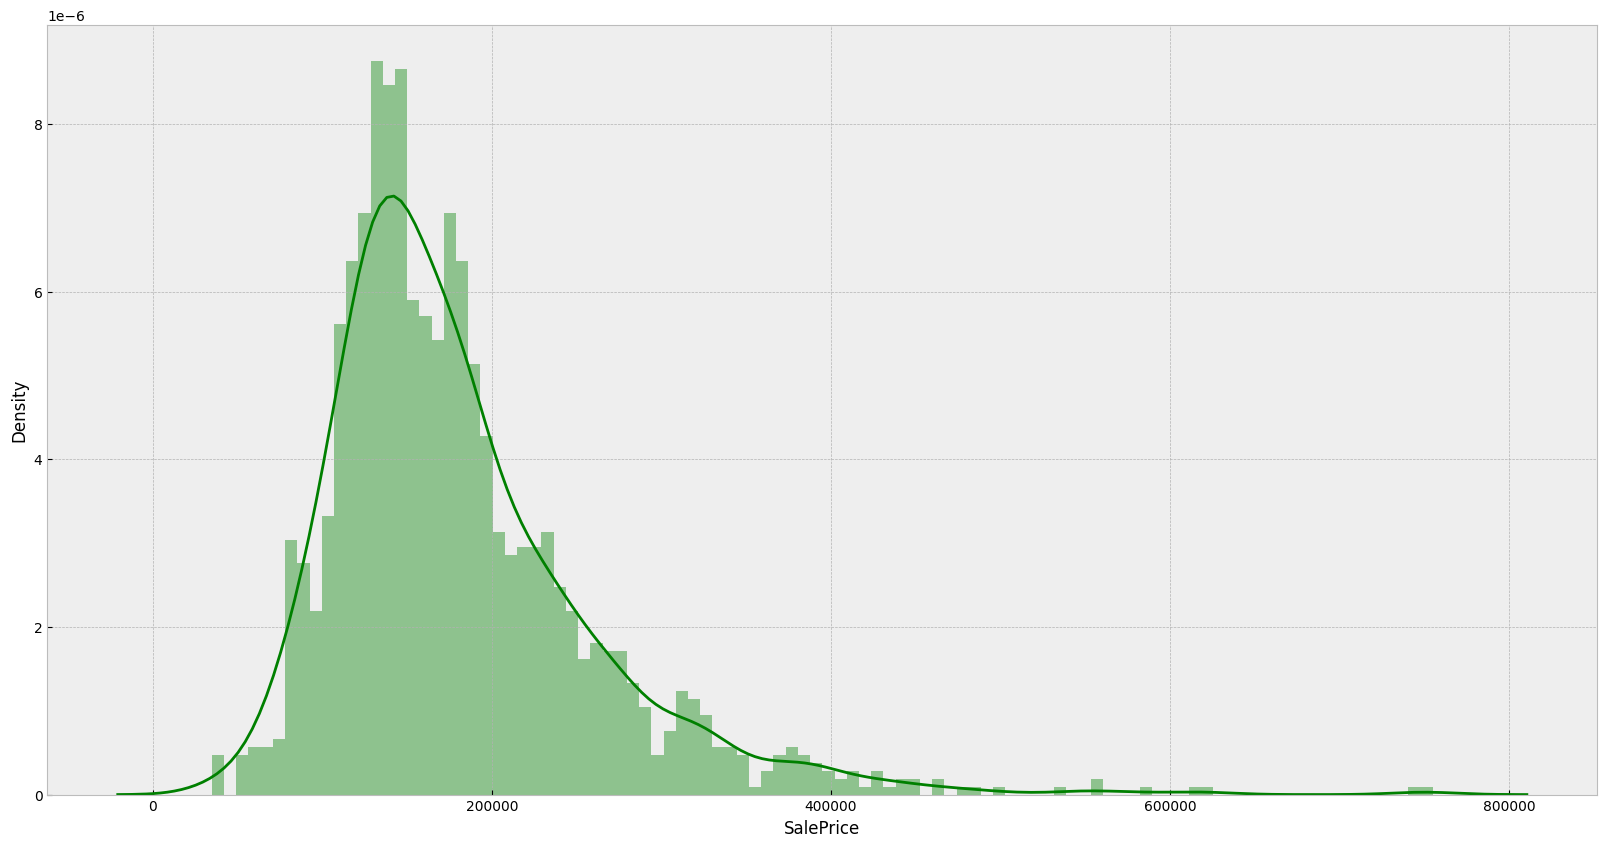

In [7]:
print(df['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [8]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 çünkü en son satır SalePrice

In [11]:
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("SalePrice ile güçlü bir şekilde ilişkili {} değer var:\n{}".format(len(golden_features_list), golden_features_list))

SalePrice ile güçlü bir şekilde ilişkili 10 değer var:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


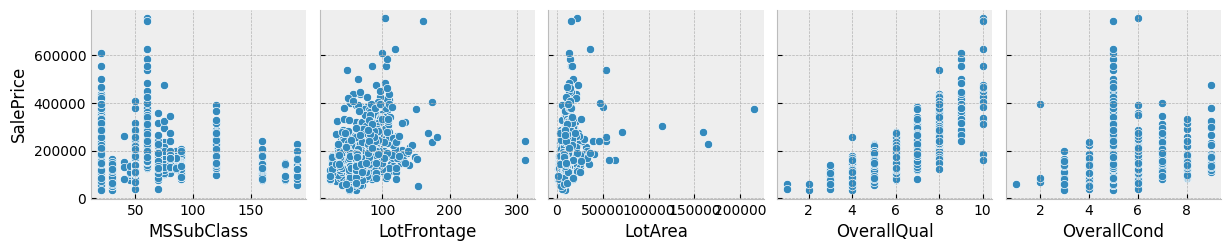

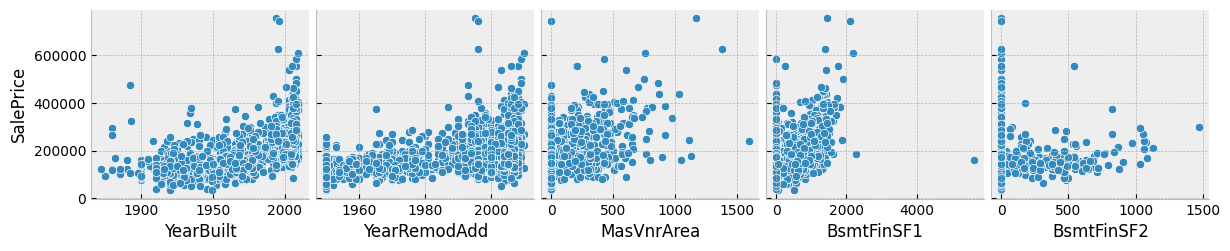

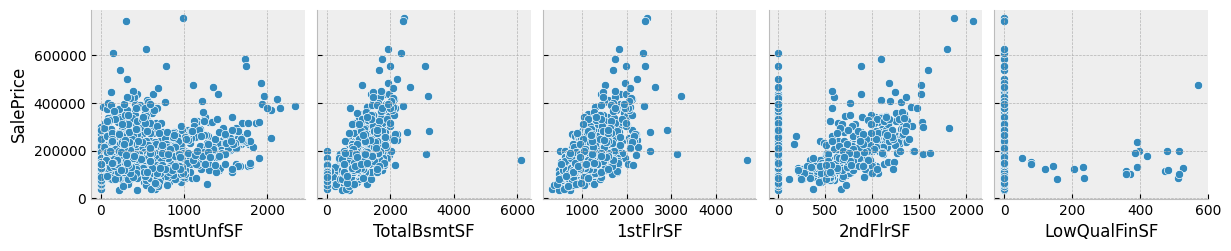

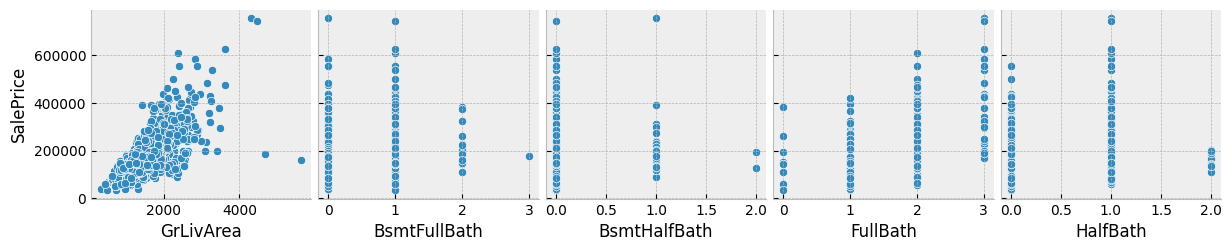

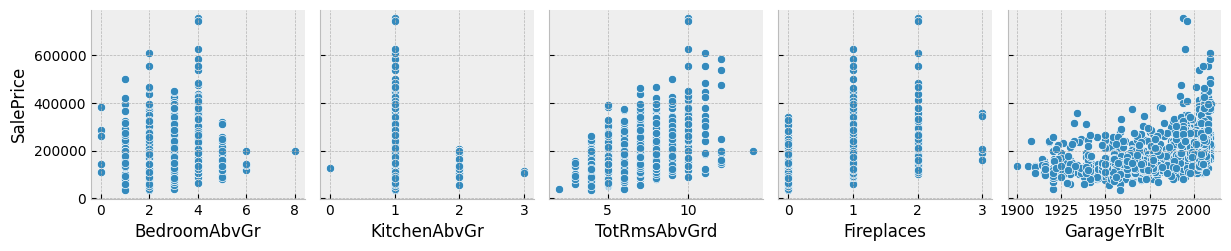

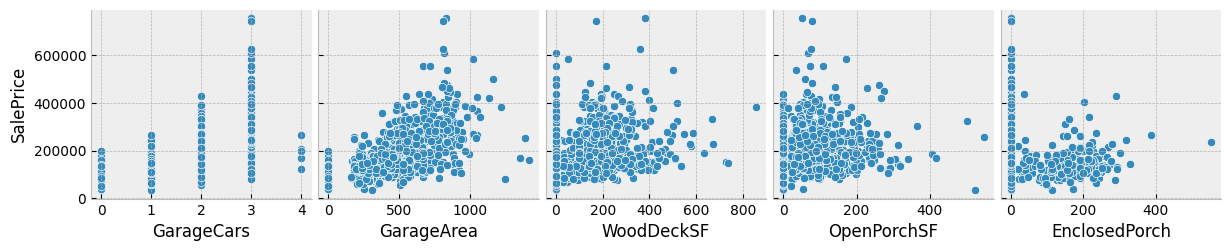

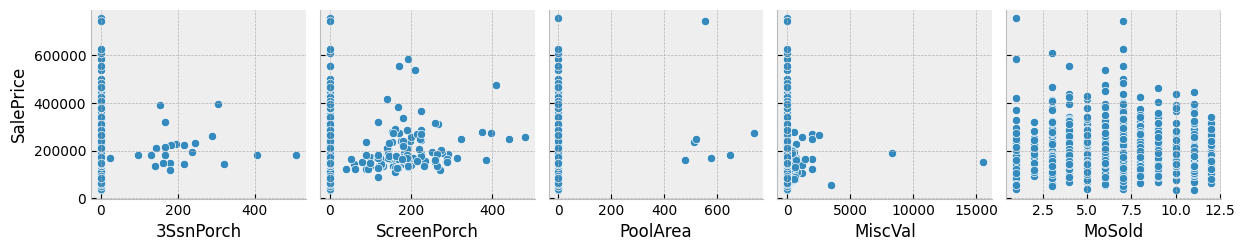

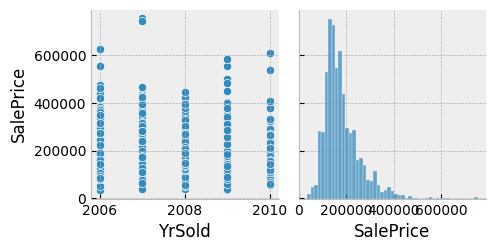

In [12]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [13]:
import operator

In [14]:
individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 çünkü son sütun SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

In [15]:
all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

In [16]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("SalePrice ile güçlü bir şekilde ilişkili {} değer var:\n{}".format(len(golden_features_list), golden_features_list))

SalePrice ile güçlü bir şekilde ilişkili 11 değer var:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


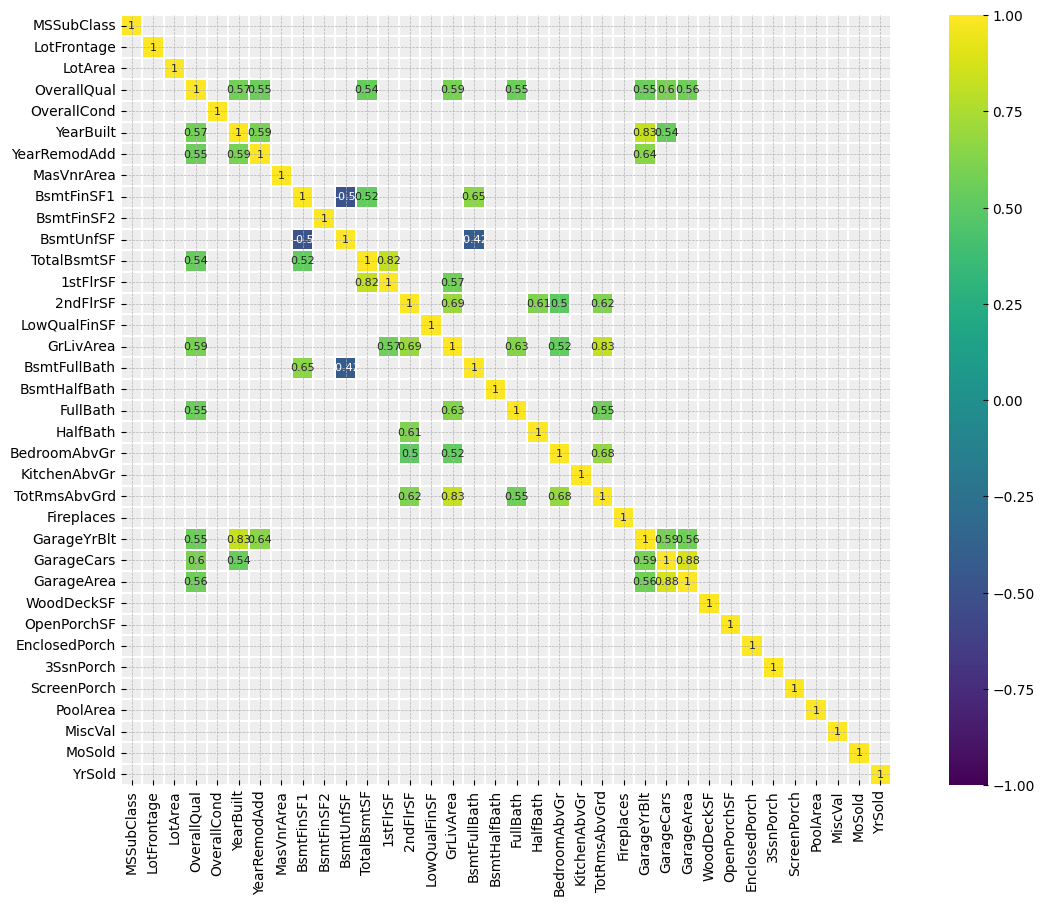

In [17]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(15, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [18]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [19]:
df_quantitative_values = df[quantitative_features_list]

In [20]:
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


In [21]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]

In [22]:
features_to_analyse.append('SalePrice')

In [23]:
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

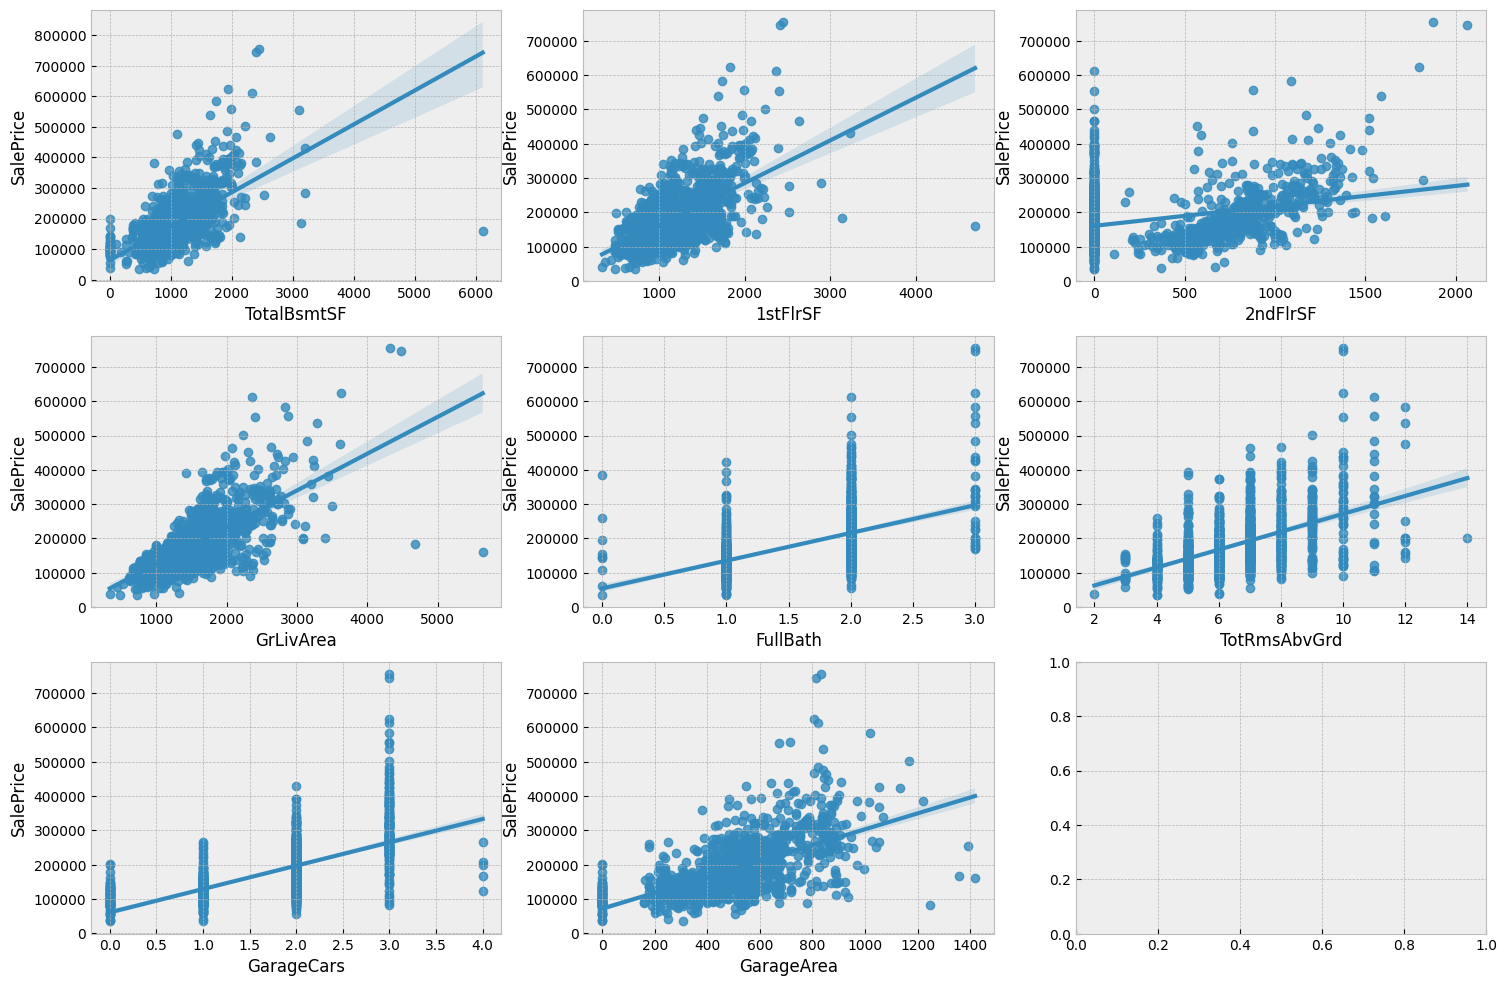

In [24]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

In [25]:
# quantitative_features_list[:-1] çünkü son sütun SalePrice ve biz onu korumak istiyoruz
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]

In [26]:
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [27]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('Aşağıdakiler dahil {} sayısal olmayan özellik vardır:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

Aşağıdakiler dahil 39 sayısal olmayan özellik vardır:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'), Text(1, 0, 'Gd'), Text(2, 0, 'Mn'), Text(3, 0, 'Av')])

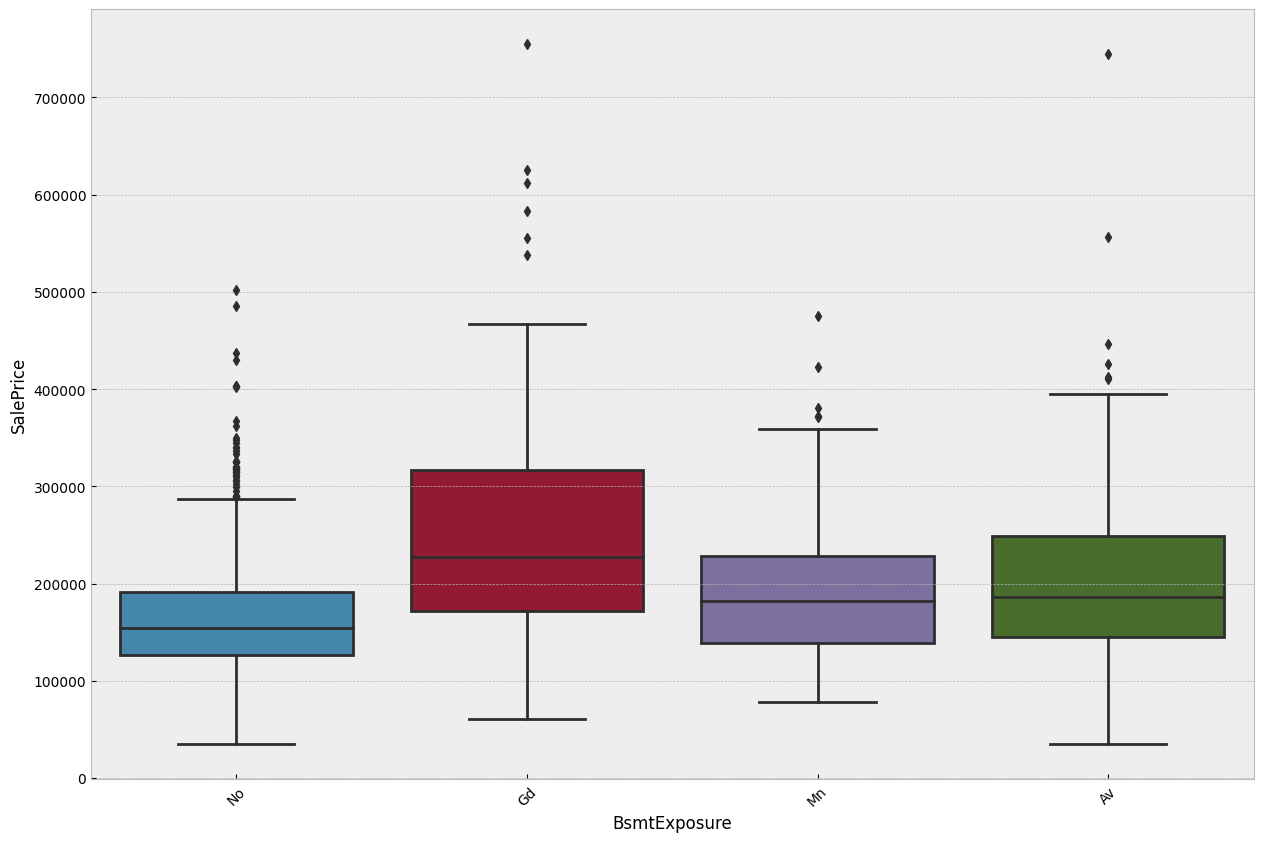

In [28]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

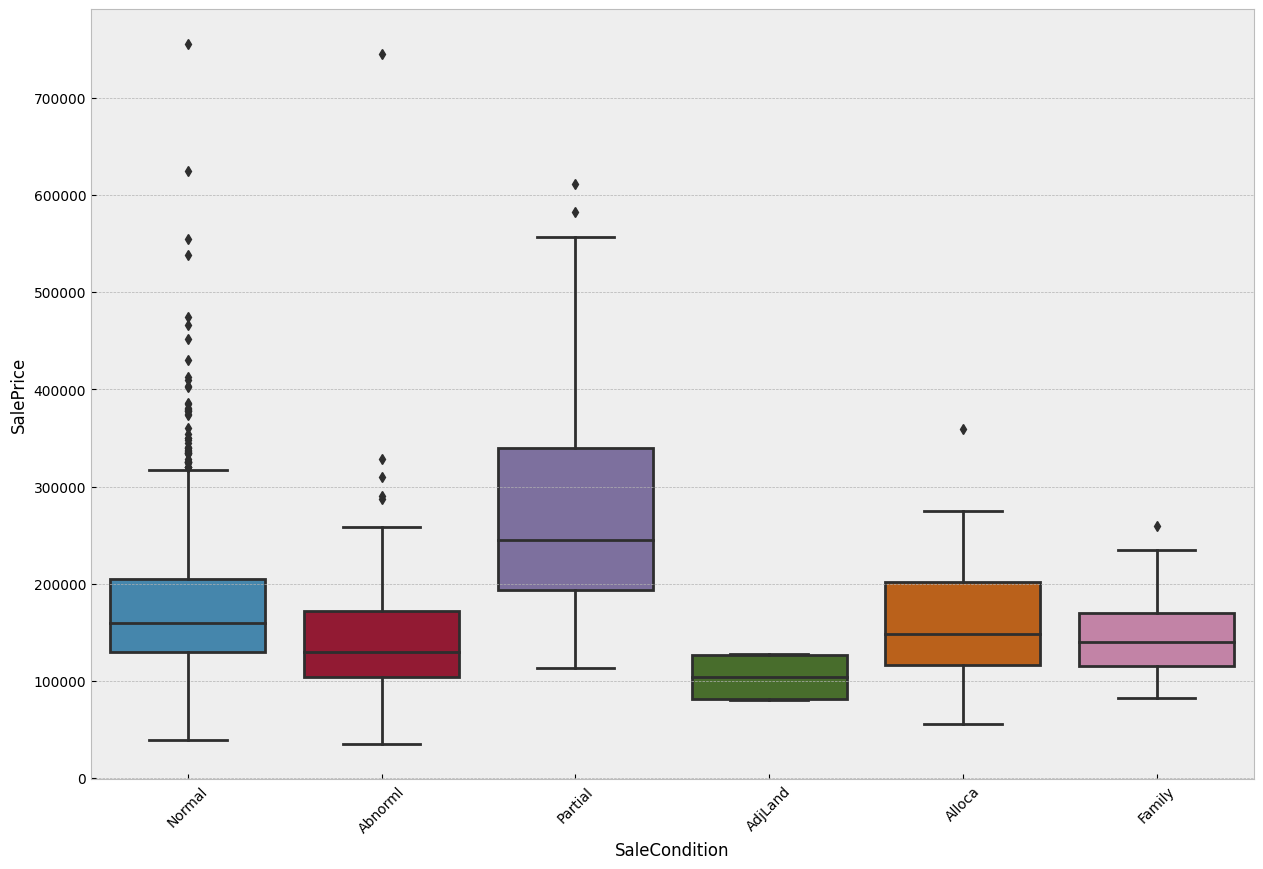

In [29]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

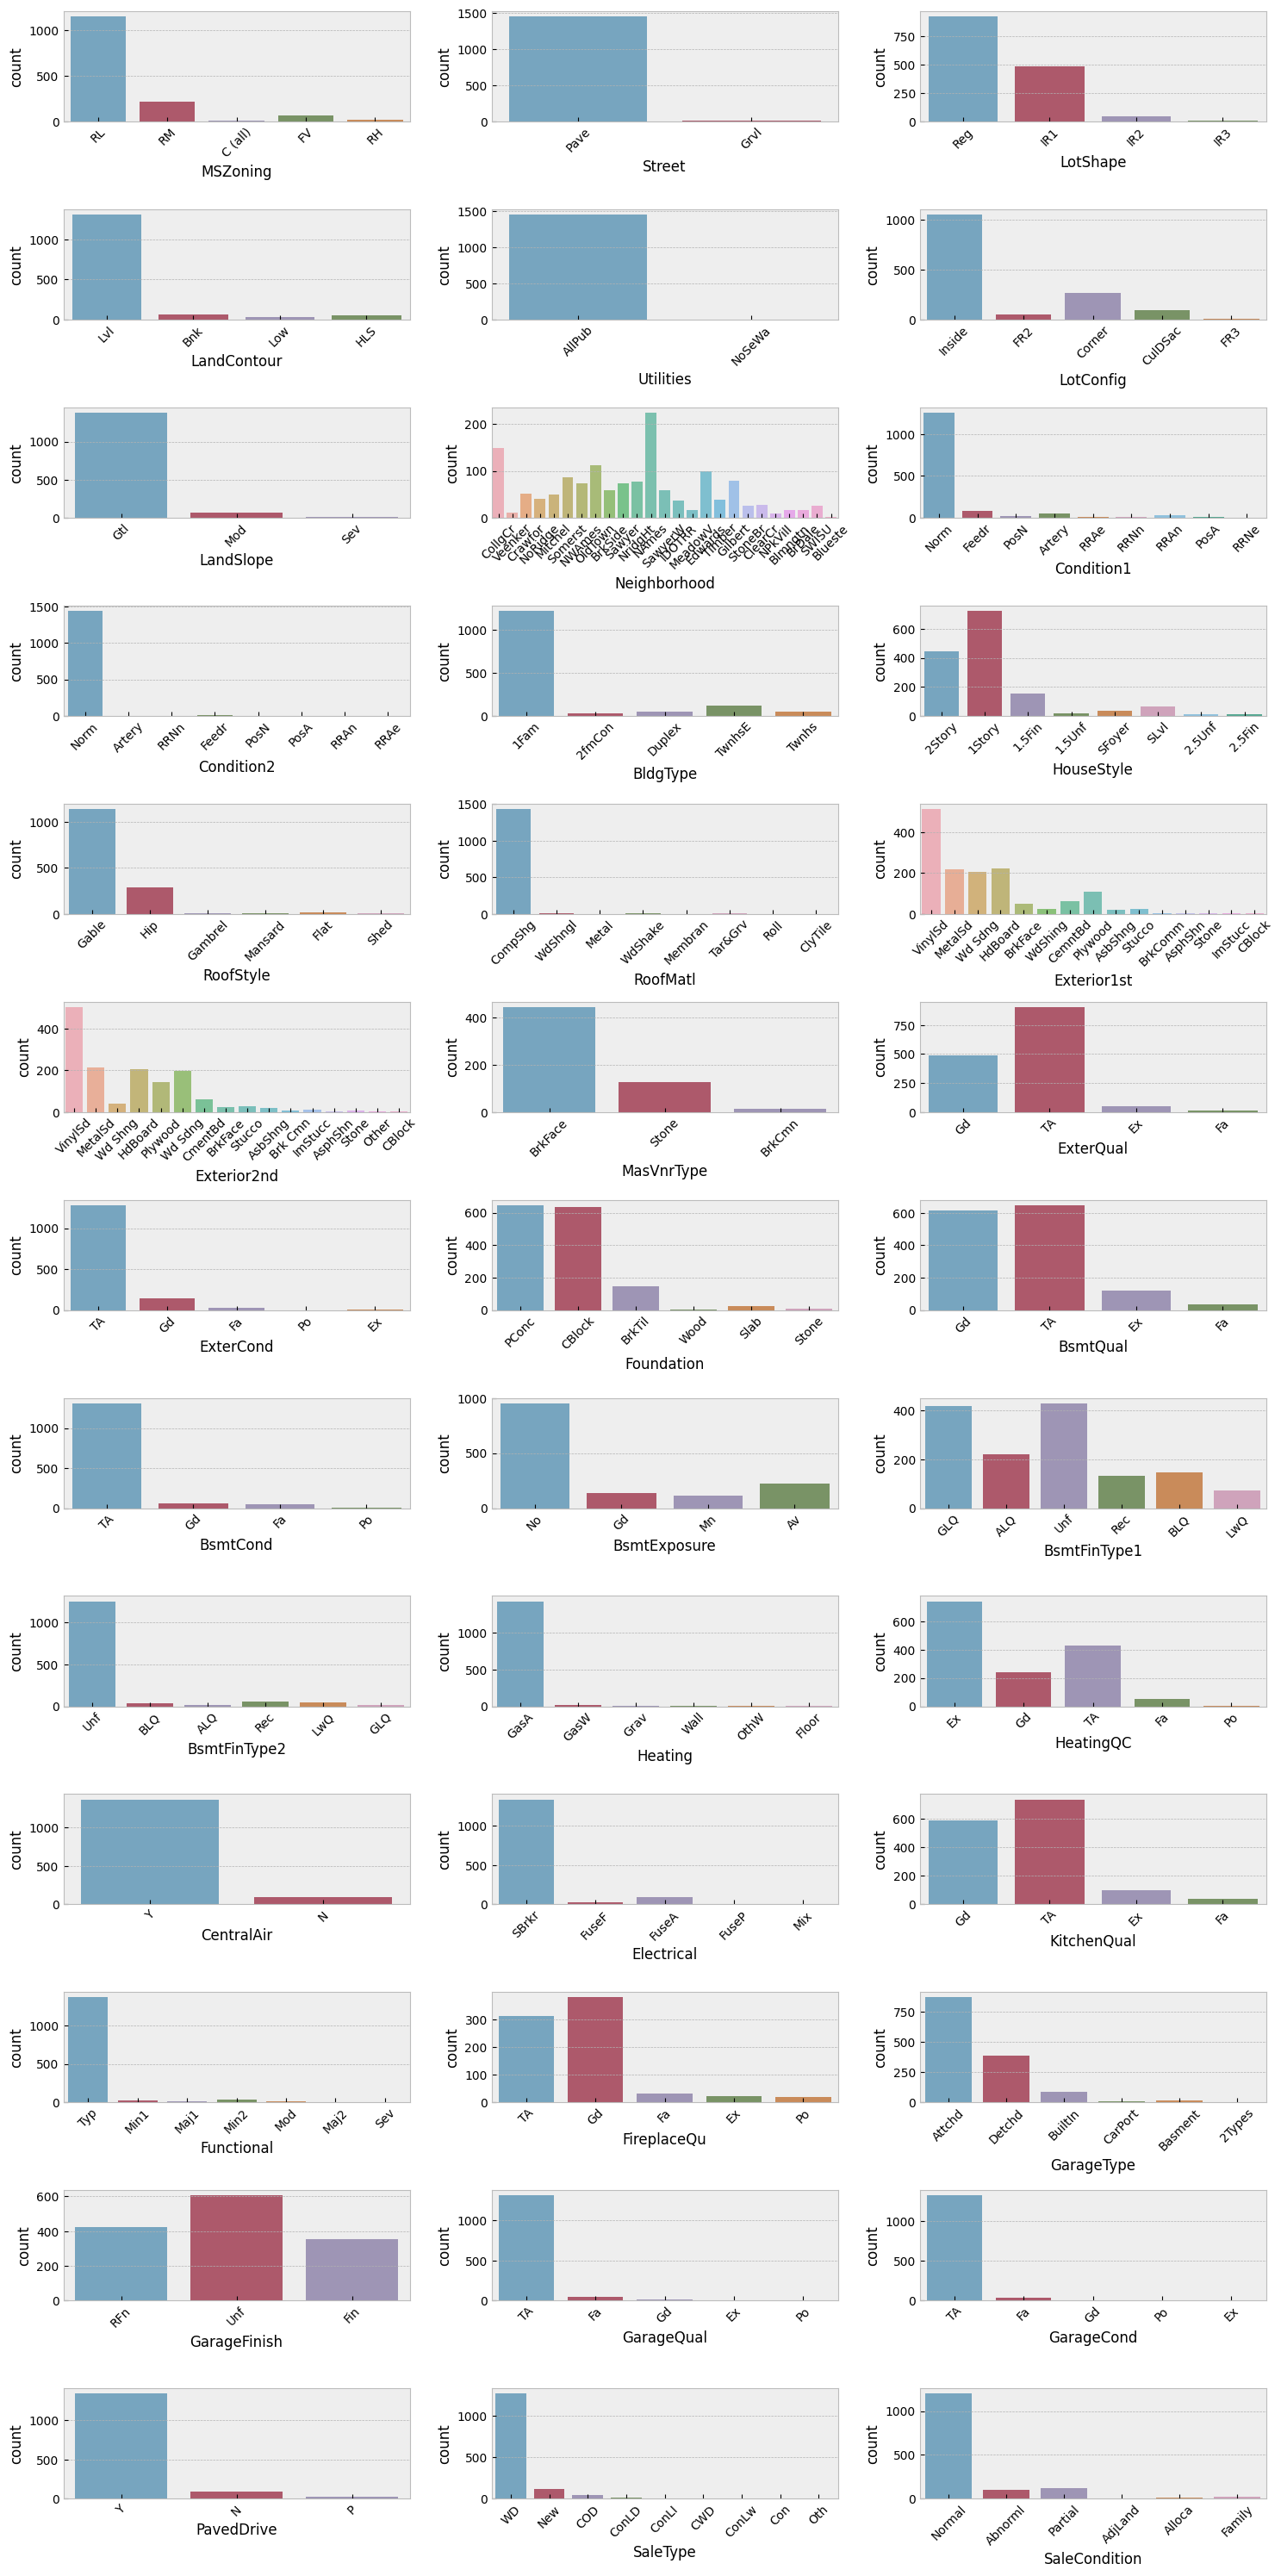

In [30]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

In [31]:
import pandas as pd
from tqdm import tqdm

In [32]:
train = pd.read_csv('../input/ames-housing-dataset/AmesHousing.csv')
train.drop(['PID'], axis=1, inplace=True)
origin = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train.columns = origin.columns
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/ames-housing-dataset/AmesHousing.csv'

In [ ]:
print(f'train verilerindeki satır sayısı: {train.shape[0]}')
print(f'train verilerindeki sütun sayısı: {train.shape[1]}')
print(f'train verilerindeki değer sayısı: {train.count().sum()}')
print(f'train verilerindeki eksik değerlerin sayısı: {sum(train.isna().sum())}')
train.head()

In [ ]:
print(f'origin verilerindeki satır sayısı: {origin.shape[0]}')
print(f'origin verilerindeki sütun sayısı: {origin.shape[1]}')
print(f'origin verilerindeki değer sayısı: {origin.count().sum()}')
print(f'origin verilerindeki eksik değerlerin sayısı: {sum(origin.isna().sum())}')
origin.head()

In [ ]:
print(f'test verilerindeki satır sayısı: {test.shape[0]}')
print(f'test verilerindeki sütun sayısı: {test.shape[1]}')
print(f'test verilerindeki değer sayısı: {test.count().sum()}')
print(f'test verilerindeki eksik değerlerin sayısı: {sum(test.isna().sum())}')
test.head()

In [ ]:
print(f'submission verilerindeki satır sayısı: {submission.shape[0]}')
print(f'submission verilerindeki sütun sayısı: {submission.shape[1]}')
print(f'submission verilerindeki değer sayısı: {submission.count().sum()}')
print(f'submission verilerindeki eksik değerlerin sayısı: {sum(submission.isna().sum())}')
submission.head()

In [ ]:
missing = test.isnull().sum()
missing = missing[missing>0]

In [ ]:
train.drop(missing.index, axis=1, inplace=True)
train.drop(['Electrical'], axis=1, inplace=True)

In [ ]:
test.dropna(axis=1, inplace=True)
test.drop(['Electrical'], axis=1, inplace=True)

In [ ]:
l_test = tqdm(range(0, len(test)), desc='Matching')
for i in l_test:
    for j in range(0, len(train)):
        for k in range(1, len(test.columns)):
            if test.iloc[i,k] == train.iloc[j,k]:
                continue
            else:
                break
        else:
            submission.iloc[i, 1] = train.iloc[j, -1]
            break
l_test.close()


In [ ]:
submission.to_csv('submission_house_price.csv', index=False)